# Medical Cost Personal Insurance Project

### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

#### Columns                                            

    •	age: age of primary beneficiary
    •	sex: insurance contractor gender, female, male
    •	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to     
        height , objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
    •	children: Number of children covered by health insurance / Number of dependents
    •	smoker: Smoking
    •	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    •	charges: Individual medical costs billed by health insurance


#### Predict : 
    Can you accurately predict insurance costs?

### Dataset Link-
    https://github.com/dsrscientist/dataset4
    https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [4]:
#========================================================================
#Predicting Insurance Costs
#========================================================================


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(1338, 7)

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# from count it has been observed that no data is missing
# minimum age is 18 and maximum age is 64
# minimum charges are 1121.873900 and maximum are  63770.428010

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#This also verifies that there are no missing values

### Outlier Analysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


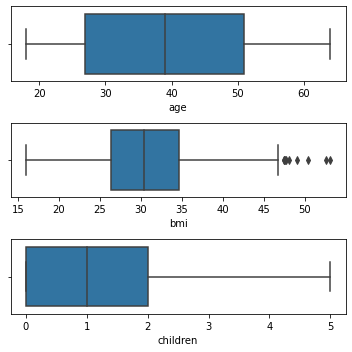

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))# figure_name = plt.figure(figsize=(width, height))
#The subplot() function takes three arguments that describes the layout of the figure.

#The layout is organized in rows and columns, which are represented by the first and second argument.

#The third argument represents the index of the current plot.
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt2 = sns.boxplot(df['bmi'], ax = axs[1])
plt3 = sns.boxplot(df['children'], ax = axs[2])
plt.tight_layout()
plt.savefig('boxplot.png')

In [22]:
# Since outliers are present in BMI we have to rmove it

In order to remove outlier we have to detect them. 

In [25]:
# Find the IQR (inter quantile range) to identify outliers
# First quantile
q1=df.quantile(0.25)

# Third  quantile
q3=df.quantile(0.75)

# IQR
iqr=q3-q1

In [26]:
bmi_high=(q3.bmi+1.5*iqr.bmi)
print(bmi_high)

index=np.where(df['bmi']>bmi_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

47.290000000000006
(1329, 7)


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
df.shape

(1329, 7)

In [28]:
# previously 1338 rows, now 1329 rows

In [35]:
# We have to convert  categorical data into numeric-the sex column smoker column and region column 

#Let’s use the get_dummies function of Pandas to convert sex column. It will create two columns, one for male, one for female.

In [46]:
pd.get_dummies(df["sex"])

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


What we can do is to remove the first column because one column indicates the value of the other column. For example, if the male is 1, then the female will be 0 and vice versa.

In [63]:
 df['sex']=pd.get_dummies(df["sex"],drop_first=True)

Let’s do the same for smoker column and region column:

In [64]:
df["smoker"]=pd.get_dummies(df["smoker"],drop_first=True)


In [71]:
df["gender"] = np.where(df["gender"] == "female", 0, 1)
region_new= {'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}

In [76]:
df['region']=df['region'].replace(['northwest', 'northeast','southeast','southwest'],
                        [0, 1,2,3])

In [77]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520


In [80]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.511663,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.107909,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


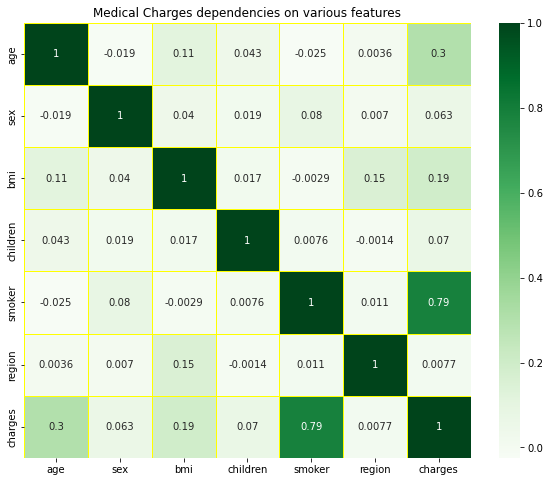

In [95]:
# plotting the heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap="Greens",annot=True,linewidths = 1, linecolor = "yellow")
 #cmap: The mapping from data values to color space.,annot: If True, write the data value in each cell.
plt.title("Medical Charges dependencies on various features")
plt.show()

 From the above heat map it can be observed that highest dependency is whether the person is smoker or non smoker, followed by age and bmi. on the other hand other features such as sex, no. of children and region have negligible effect. so we can drop last three features

<AxesSubplot:xlabel='bmi', ylabel='charges'>

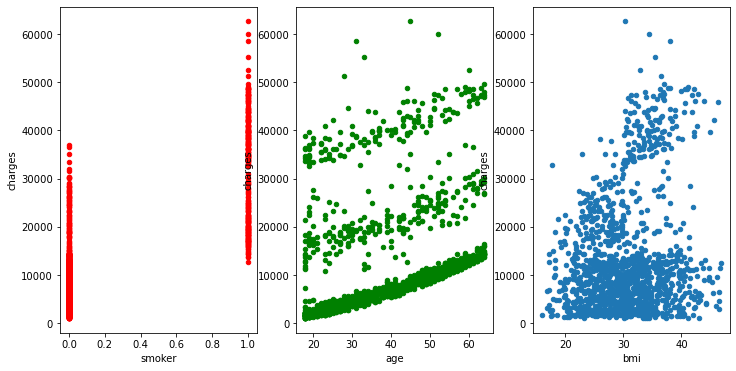

In [101]:
# visualize the relationship between the features and response using scater plots
fig,axs=plt.subplots(1,3)
df.plot(kind='scatter', x='smoker', y='charges',color='red',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter', x='age', y='charges',color='green',ax=axs[1],figsize=(12,6))
df.plot(kind='scatter', x='bmi', y='charges',ax=axs[2],figsize=(12,6))



From the scatter plot it can be seen that high charges are to be paid by smokers as compared to non smokers . similarly  there is positive relationship between age and charges, bmi and charges 

<AxesSubplot:xlabel='region', ylabel='charges'>

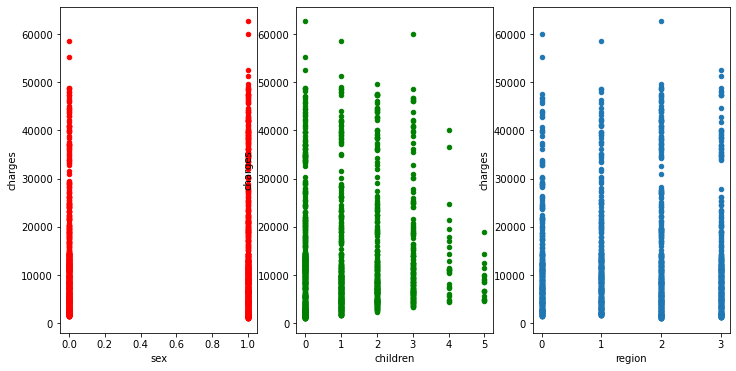

In [102]:
# visualize the relationship between the features and response using scater plots
fig,axs=plt.subplots(1,3)

df.plot(kind='scatter', x='sex', y='charges',color='red',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter', x='children', y='charges',color='green',ax=axs[1],figsize=(12,6))
df.plot(kind='scatter', x='region', y='charges',ax=axs[2],figsize=(12,6))


Whereas if we look into the sex of the customer, no. of children or region then hardly there is any significant effect. Hence these three features can be dropped.

In [104]:
df_new=df.drop(['sex','children','region'], axis=1)

In [108]:
df_new.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### Regression Problem

Since we have to calculate the medical insurance the given problem is a regression problem. In this project we will use 
1. Linear Regression


###  Splitting data into test and train

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)


In [114]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1063, 3)
Size of y_train :  (1063,)
Size of X_test :  (266, 3)
Size of Y_test :  (266,)


### Importing Libraries

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

### Linear Regression

In [118]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred=lm.predict(X_test)


##### Metrics to check the model performance

In [133]:
# R2 Score
print("R2 Score:", r2_score(y_test,y_pred))

R2 Score: 0.710473134391423


In [131]:
print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 49345958.75429039


In [136]:
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 4789.478375768834
